## Clasificación por Particiones - Metodo del histograma

### Julian Ferres - Nro.Padrón 101483

## Enunciado

Sean las regiones $R_0$ y $R_1$ y la cantidad de puntos $n$, donde:

- $R_0$ es el triangulo con vertices $(1,0)$, $(1,1)$ y $(\frac{1}{2},0)$
- $R_1$ es el triangulo con vertices $(0,0)$, $(\frac{1}{2},1)$ y $(0,1)$

- $n = 10, 100, 1000, 10000, \ldots$

Se simulan $n$ puntos en $\mathbb{R}^2$ siguiendo los pasos:
    
>- Cada punto pertenece a una de las dos clases: **_Clase 0_** o **_Clase 1_** con probabilidad $\frac{1}{2}$

>- Los puntos de la clase $i$ tienen distribución uniforme con soporte en $R_i$ , con $i=0,1$

**Se pide, con la muestra, construir una regla del histograma que permita clasificar un punto que no pertenezca a la misma**

## Solución

In [91]:
#Import libraries
import numpy as np
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
n = 10000 #Tamaño de muestra

In [93]:
muestra = np.zeros((n,3))

#### Toma de muestra

In [94]:
i = 0 #Puntos incluidos hasta el momento.
while(i < n):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    clase = np.random.randint( 0 , 1 + 1 ) #Uniforme discreta en {0,1}
    if (( clase == 0 and abs(2*x-1) < y) or ( clase == 1 and y < 2*x < 2-y )):
        muestra[i][0] = x
        muestra[i][1] = y
        muestra[i][2] = clase
        i+=1

In [95]:
clase0 , clase1 = muestra[(muestra[:,2] == 0.)] , muestra[(muestra[:,2] == 1.)]

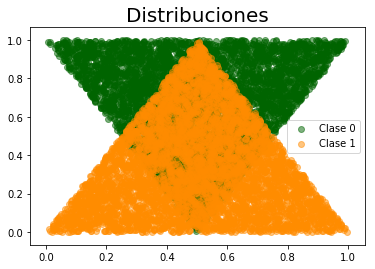

In [96]:
g = plt.scatter( clase0[:,0] , clase0[:,1] , alpha='0.5', color='darkgreen' , label = 'Clase 0');
g = plt.scatter( clase1[:,0] , clase1[:,1] ,alpha='0.5', color='darkorange' , label = 'Clase 1');
plt.legend()
plt.title("Distribuciones", fontsize=20)
plt.show()

### Para generar la particion tengo que saber la longitud del lado de las cajas.

#### Segun lo visto en clase, si $h_n$ es la longitud del lado de las cajas, entonces:
$$h_n = \frac {1}{\sqrt[2d]{n}} = n^{-\frac{1}{2d}}$$

cumple las condiciones para que la regla del histograma sea universalmente consistente.

 En este caso, con dos dimensiones, $d=2$:

In [97]:
d = 2
h_n = n **(-(1/(d*2))) 

d_n = int(1/h_n) #Podria 1/h_n no ser entero

In [98]:
particion = np.ndarray((d_n , d_n), dtype = int )
particion.fill(0)

In [99]:
for i in range(n):
    
    x_p , y_p = int(muestra[i,0]/h_n) , int(muestra[i,1]/h_n)
    
    x_p = d_n - 1 if x_p >=d_n else x_p
    y_p = d_n - 1 if y_p >=d_n else y_p
    
    particion[y_p , x_p] += 1 if muestra[i,2] else -1

In [100]:
f = lambda x : 0 if (x>= 0) else 1
f_vec = np.vectorize(f)

In [101]:
for_heatmap = f_vec(particion) #Mapeo todos los numeros a 0 o 1 

In [102]:
particion

array([[  87,   98,  109,   93,   77,   80,  100,   99,   90,   83],
       [  21,  121,   81,   96,    7,   30,   93,   92,  101,   29],
       [   0,   79,   86,   74,   15,   -1,   67,   88,   92,    0],
       [   0,   36,   93,   20,  -25,    4,   27,  109,   23,    0],
       [   0,    0,   49,   -5,    2,   -8,  -18,   57,    0,    0],
       [   0,    0,  -28,    5,  -15,   29,    8,  -36,    0,    0],
       [   0,  -21, -110,  -13,   -4,  -22,    1, -111,  -29,    0],
       [   0,  -75,  -99, -103,   19,   15,  -79, -118,  -75,    0],
       [ -21,  -99, -109, -106,   -7,  -27,  -82,  -89, -107,  -23],
       [ -62, -102, -109, -107,  -85,  -60,  -95,  -97,  -98,  -83]])

In [103]:
for_heatmap

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

## Clasificación mediante método del histograma

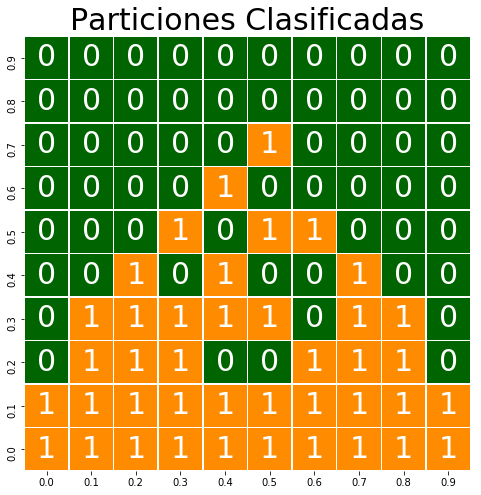

In [104]:
dims = (8, 8)
fig, axs = plt.subplots(figsize=dims)

g = sns.heatmap(for_heatmap, annot= True , linewidths=.5,cmap=['darkgreen','darkorange'],\
                cbar = False, annot_kws={"size": 30},\
                xticklabels = [round(x/d_n,2) for x in range(d_n)],\
                yticklabels = [(round(1-x/d_n,2)) for x in range(1,d_n+1)])

g.set_title('Particiones Clasificadas' , size = 30)
plt.show()

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git